In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:
fs = 512
t = np.arange(0, 4, 1/fs)

# Rectangular function 
$$ f(t) = \sum \limits_{k=1,3,5,...}^{n} \frac{4}{n \pi} sin(n\omega_0 t)$$

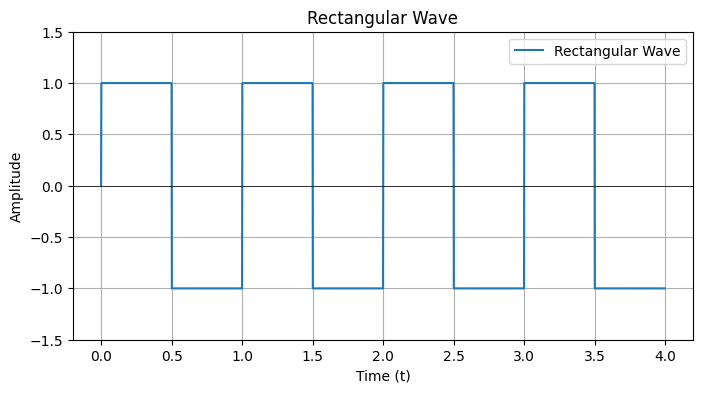

In [37]:
# Define the rectangular function
rect_func = np.sign(np.sin(2 * np.pi * t))

# Plotting
plt.figure(figsize=(8, 4))
plt.plot(t, rect_func, label='Rectangular Wave')
plt.title('Rectangular Wave')
plt.xlabel('Time (t)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.ylim([-1.5, 1.5])
plt.axhline(0, color='black', linewidth=0.5)
plt.legend()
plt.show()

# Approximation of $ f(t) \sim \sum\limits_{k=1}^n \frac{4}{k \pi} sin(k \omega_0 t)$ as ΣFourier Series

### Fourie Series Element Wave

In [38]:
def wave(k: int, t: np.ndarray):
    """
    Args:
        k: frequency index 1, 3, 5 (odd numbers)
    """
    return 4 * np.sin(2 * np.pi * k * t) / np.pi / k

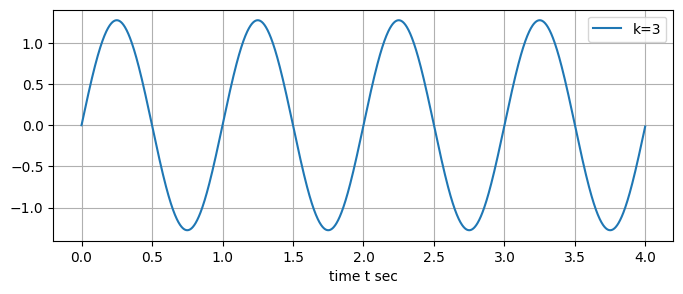

In [39]:
plt.figure(figsize=(8, 3))
plt.plot(t, wave(k=1, t=t), label="k=3")
plt.xlabel("time t sec")
plt.legend()
plt.grid()

In [44]:
def f_approximation(n: int, t: np.ndarray):
    return np.sum(
        np.array([
            wave(k, t)
            for k in range(1, n, 2) # odd numbers
        ]),
        axis=0
    )

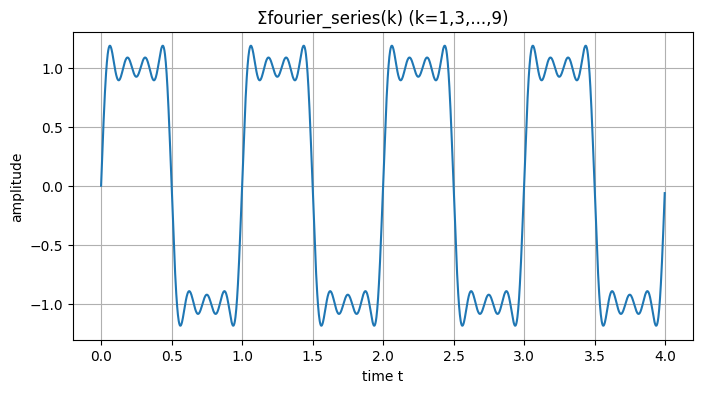

In [45]:
plt.figure(figsize=(8,4))
plt.plot(t, f_approximation(9, t))
plt.title("Σfourier_series(k) (k=1,3,...,9)")
plt.xlabel("time t")
plt.ylabel("amplitude")
plt.grid()

# Verlocity of the point on Fourier Series Wave

$$\frac{dwave}{dt} = \frac {8}{T} cos(kω_0t)$$

The velocity of a point on a fouries series wave does not decay. If seepd of the moving point on the wave does not decay, then it always readh the same maximum ampitude forever. 

In [46]:
def velocity(k: int, t: np.ndarray):
    return 8 * np.cos(2 * np.pi * k * t)

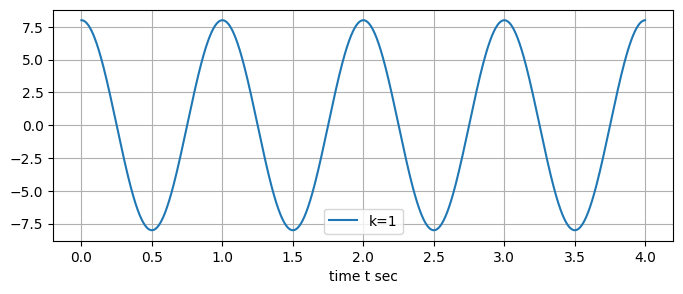

In [47]:
plt.figure(figsize=(8, 3))
plt.plot(t, velocity(k=1, t=t), label="k=1")
plt.xlabel("time t sec")
plt.legend()
plt.grid()

## Gibbs Phenomenon as Momentum

Sum of velocaity of all the points of fouries Series accumulates momentum to overshoot, which results in the Gibbs phenomenon.



In [48]:
def velocity_sum_approximation(n: int, t: np.ndarray):
    return np.sum(
        np.array([
            velocity(k, t)
            for k in range(1, n, 2) # odd numbers
        ]),
        axis=0
    )

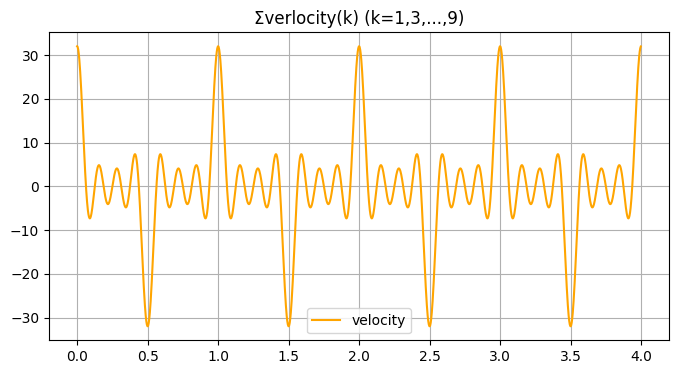

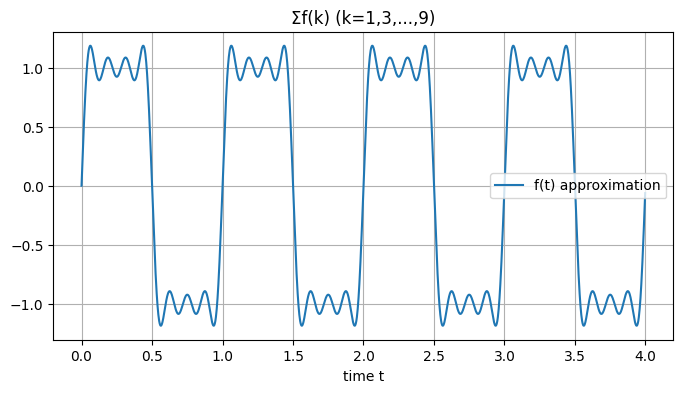

In [57]:
plt.figure(figsize=(8,4))
plt.plot(t, velocity_sum_approximation(n=9, t=t), label="velocity", color='orange')
plt.title("Σverlocity(k) (k=1,3,...,9)")
plt.legend()
plt.grid()

plt.figure(figsize=(8,4))
plt.plot(t, f_approximation(9, t), label="f(t) approximation")
plt.title("Σf(k) (k=1,3,...,9)")
plt.xlabel("time t")
plt.legend()
plt.grid()